In [1]:
from pathlib2 import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import IPython
import librosa
import librosa.display
from tqdm.autonotebook import tqdm

/home/AD/tsainbur/anaconda3/envs/neuroethology/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  if __name__ == '__main__':


### data locations

In [2]:
from glob import glob

In [3]:
fg_list = glob('/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/*_PC1113_*.wav')
len(fg_list), np.sort(fg_list)[-10:]

(234,
 array(['/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0025.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0026.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0027.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0028.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0029.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0030.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0031.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0032.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0033.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0034.wav'],
       dtype='<U78'))

In [5]:
DSLOC = Path('/mnt/cube/Datasets/StowellBirdID/')
DSLOC

PosixPath('/mnt/cube/Datasets/StowellBirdID')

In [6]:
csv_list = list(DSLOC.expanduser().glob('csv/*.csv'))
csv_list[:3]

[PosixPath('/mnt/cube/Datasets/StowellBirdID/csv/chiffchaff-acrossyear-bg-trn.csv'),
 PosixPath('/mnt/cube/Datasets/StowellBirdID/csv/pipit-withinyear-fg-tst.csv'),
 PosixPath('/mnt/cube/Datasets/StowellBirdID/csv/chiffchaff-acrossyear-bg-tst.csv')]

In [7]:
wav_list = list(DSLOC.expanduser().glob('wav/*/*.wav'))
wav_list[:3], len(wav_list)

([PosixPath('/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day1_PC1109_0386.wav'),
  PosixPath('/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day1_PC1109_0421.wav'),
  PosixPath('/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day1_PC1107_0483.wav')],
 23753)

In [59]:
#from pydub.utils import mediainfo

In [90]:
wav_df = pd.DataFrame(np.zeros((len(wav_list), 8)).astype('str'), columns = ['indv', 'species', 'wavloc', 'wavnum', 'split', 'fgbg', 'cutted', 'size'])#, 'audio', 'rate'])
for wfi, wf in enumerate(tqdm(wav_list)):
    species, fgbg = wf.parent.stem.split('-')
    cutted, split, indv, recording_num = wf.stem.split('_')
    #rate, data = load_wav(wf)
    wav_df.loc[wfi] = [indv, species, wf, recording_num, split, fgbg, cutted, wf.stat().st_size]#, data, rate]

  0%|          | 0/23753 [00:00<?, ?it/s]

In [91]:
wav_df = wav_df.sort_values(by='size', ascending=False)

In [92]:
wav_df[wav_df.fgbg=='fg'][:3]

,indv,species,wavloc,wavnum,split,fgbg,cutted,size
2233,PC1107,chiffchaff,/mnt/cube/Datasets/StowellBirdID/wav/chiffchaf...,0350,day1,fg,cutted,3255036
442,PC1110,chiffchaff,/mnt/cube/Datasets/StowellBirdID/wav/chiffchaf...,0000,day2,fg,cutted,2619564
605,PC1110,chiffchaff,/mnt/cube/Datasets/StowellBirdID/wav/chiffchaf...,0007,day2,fg,cutted,2303670


813748 22050 36.90467120181406


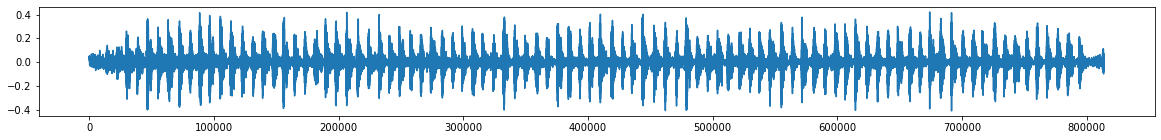

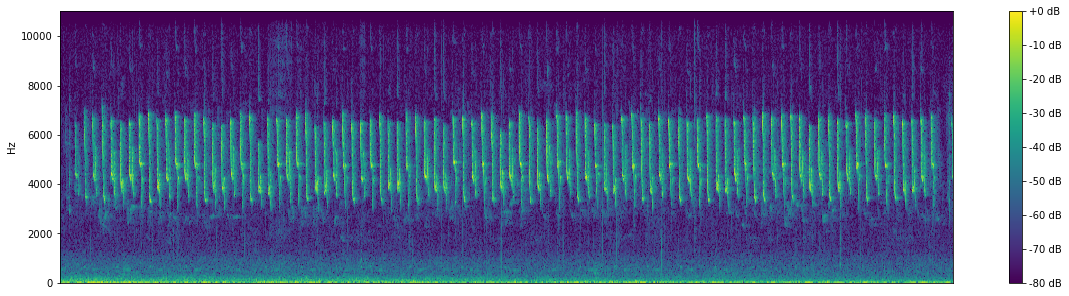

In [93]:
for idx, row in wav_df[wav_df.fgbg=='fg'].iterrows():
    y, sr = librosa.load(row.wavloc.as_posix())

    print(len(y), sr, len(y)/sr)

    fig, ax = plt.subplots(figsize=(20,2))
    ax.plot(y)

    D = np.abs(librosa.stft(y, n_fft=512))**2
    S_dB = librosa.power_to_db(D, ref=np.max)
    spec = S_dB

    fig, ax = plt.subplots(figsize=(20,5))
    img = librosa.display.specshow(spec, cmap='viridis', y_axis='linear', sr=sr,
                             fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    plt.show()
    break

In [94]:
row = wav_df[wav_df.fgbg=='fg'].iloc[0]

In [95]:
y, sr = librosa.load(row.wavloc.as_posix())
y = y[2000:400000]

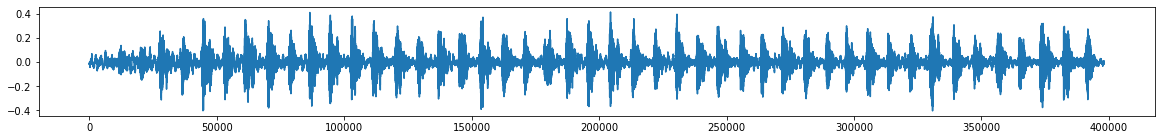

In [96]:
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(y)

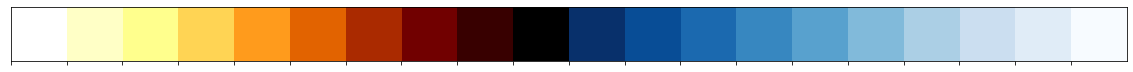

In [97]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import copy

afm_hot = cm.get_cmap('afmhot', 10)
bone  = cm.get_cmap('bone', 10)
blues  = cm.get_cmap('Blues', 10)

np.logspace(-10,0, 10)

afmhot_blues = np.vstack([afm_hot(np.linspace(0,1, 10))[::-1], blues(np.linspace(0,1, 10))[::-1]])#[::-1]

afmhot_blues_cmap = LinearSegmentedColormap.from_list('afmhot_blues', afmhot_blues)

import seaborn as sns

sns.palplot(afmhot_blues)

# ARTIFICIAL NOISE

In [98]:
from noisereduce.generate_noise import band_limited_noise

In [99]:
import copy

In [100]:
import noisereduce as nr

In [101]:
y, sr = librosa.load(row.wavloc.as_posix())
y = y[2000:800000]

y_increasing = copy.deepcopy(y)
y_noise = band_limited_noise(5000, 8000, samples = len(y), samplerate= sr)

start = 200000
stop = 250000
y_noise[:start] = 0
mult = 3
y_noise[start:stop] = y_noise[start:stop] * np.linspace(0, 1, stop-start)
#y_increasing[start:stop] = y_increasing[start:stop] * np.linspace(1, mult, stop-start)
#y_increasing[stop:] = y_increasing[stop:] * mult


y_with_noise = y_increasing+y_noise*40

In [124]:
len(y_with_noise)/sr

36.19047619047619

In [102]:
reduced_noise_stationary = nr.reduce_noise(y = y_with_noise, sr=sr, stationary=True, n_std_thresh_stationary = 1.5, n_fft = 512)
reduced_noise_nonstationary = nr.reduce_noise(y = y_with_noise, sr=sr, thresh_n_mult_nonstationary=1.75,stationary=False, time_constant_s = 0.5)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [103]:
D = np.abs(librosa.stft(y_with_noise, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec = S_dB

In [104]:
D = np.abs(librosa.stft(reduced_noise_stationary, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec_stationary = S_dB
D = np.abs(librosa.stft(reduced_noise_nonstationary, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec_nonstationary = S_dB

In [105]:
end2 = 4000

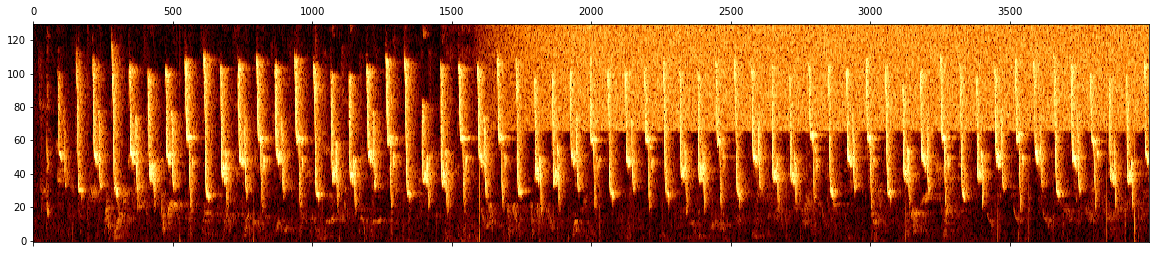

In [106]:
fig, ax = plt.subplots(figsize=(20,4))
ax.matshow(spec[ 50:180, :end2], origin = 'lower', aspect='auto', cmap = plt.cm.afmhot)

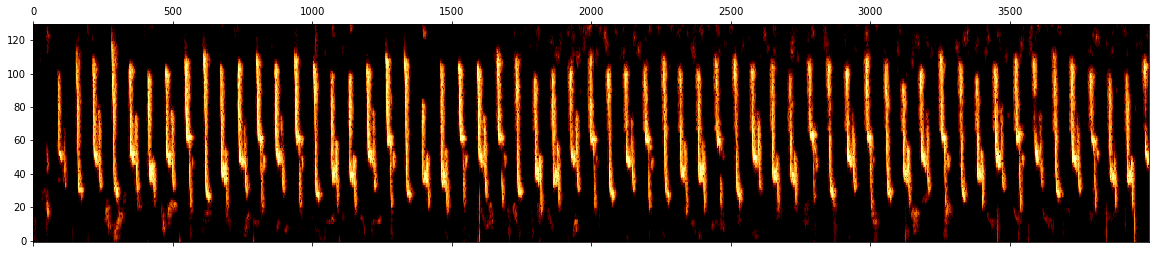

In [107]:
fig, ax = plt.subplots(figsize=(20,4))
ax.matshow(spec_nonstationary[ 50:180, :end2], origin = 'lower', aspect='auto', cmap = plt.cm.afmhot)

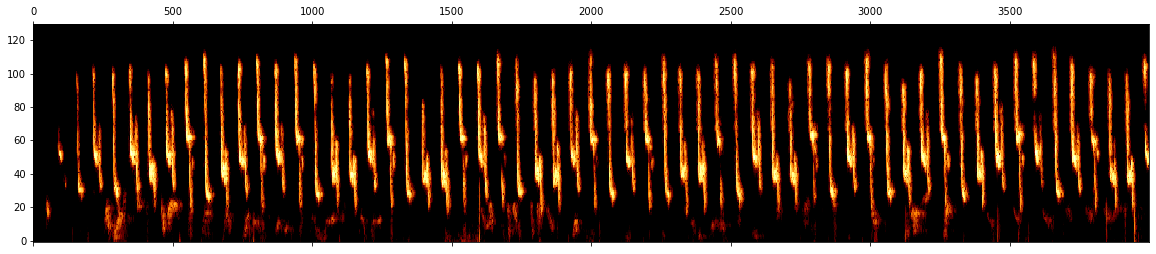

In [108]:
fig, ax = plt.subplots(figsize=(20,4))
ax.matshow(spec_stationary[ 50:180, :end2], origin = 'lower', aspect='auto', cmap = plt.cm.afmhot)

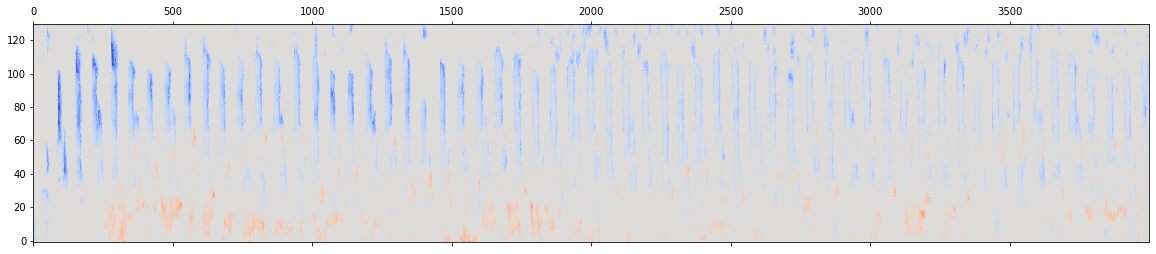

In [109]:
fig, ax = plt.subplots(figsize=(20,4))
diff_spec = spec_stationary[ 50:180, :end2] - spec_nonstationary[ 50:180, :end2]
ax.matshow(diff_spec, origin = 'lower', aspect='auto', cmap= plt.cm.coolwarm, vmax=np.max(np.abs(diff_spec)),vmin=-np.max(np.abs(diff_spec)))

In [110]:
np.mean(diff_spec)

-1.4914310364311667

In [111]:
np.max(diff_spec), np.min(diff_spec)

(29.372737630781828, -55.885060011066294)

## plane

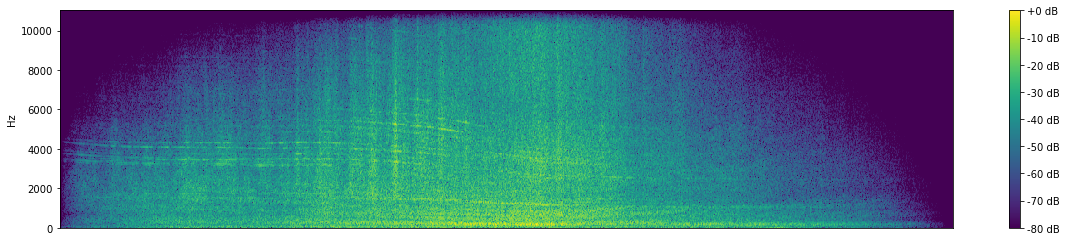

In [113]:
airplane_wav = 'airplane-fly-by-01a.wav'
y_airplane, sr_airplane = librosa.load(airplane_wav)


D = np.abs(librosa.stft(y_airplane, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec = S_dB

fig, ax = plt.subplots(figsize=(20,4))
img = librosa.display.specshow(spec, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()

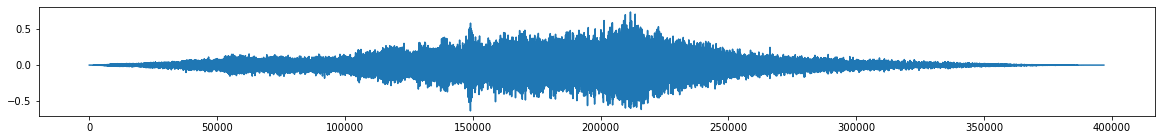

In [117]:
fig, ax = plt.subplots(figsize=(20,2))
plt.plot(y_airplane)

In [129]:
len(y_airplane), sr_airplane, len(y_airplane)/ sr_airplane

(396900, 22050, 18.0)

In [130]:
len(y) - start

328000

In [155]:
len(y_airplane)

396900

In [154]:
len( y[start:len(y_airplane)+start])

396900

In [185]:
y, sr = librosa.load(row.wavloc.as_posix())
y = y[2000:450000]
start = 20000 
y_with_noise = copy.deepcopy(y)
y_with_noise[start:len(y_airplane)+start] += y_airplane * 0.5

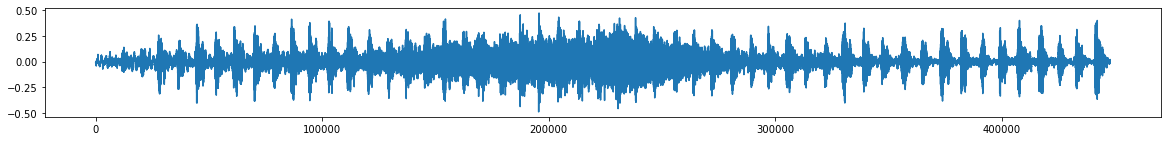

In [186]:
fig, ax = plt.subplots(figsize=(20,2))
plt.plot(y_with_noise)

In [187]:
reduced_noise_stationary = nr.reduce_noise(y = y_with_noise, sr=sr, stationary=True, n_std_thresh_stationary = 1.5, n_fft = 512)
reduced_noise_nonstationary = nr.reduce_noise(y = y_with_noise, sr=sr, thresh_n_mult_nonstationary=1.75,stationary=False, time_constant_s = 0.5)

In [188]:
D = np.abs(librosa.stft(y_with_noise, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec = S_dB

In [189]:
D = np.abs(librosa.stft(reduced_noise_stationary, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec_stationary = S_dB
D = np.abs(librosa.stft(reduced_noise_nonstationary, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec_nonstationary = S_dB

In [190]:
end2 = 4000

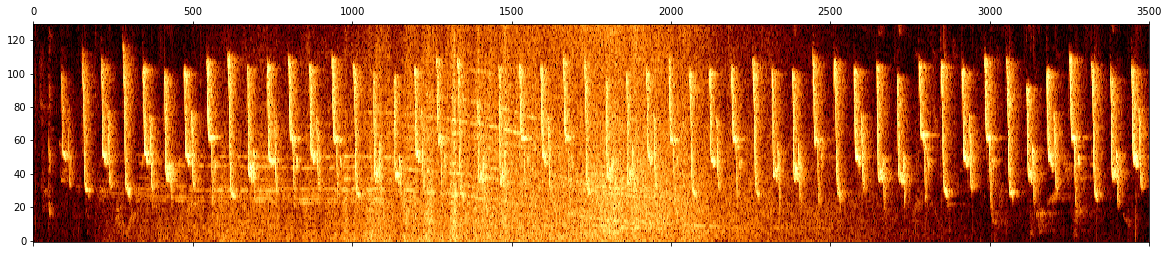

In [201]:
fig, ax = plt.subplots(figsize=(20,4))
ax.matshow(spec[ 50:180, :end2], origin = 'lower', aspect='auto', cmap = plt.cm.afmhot)

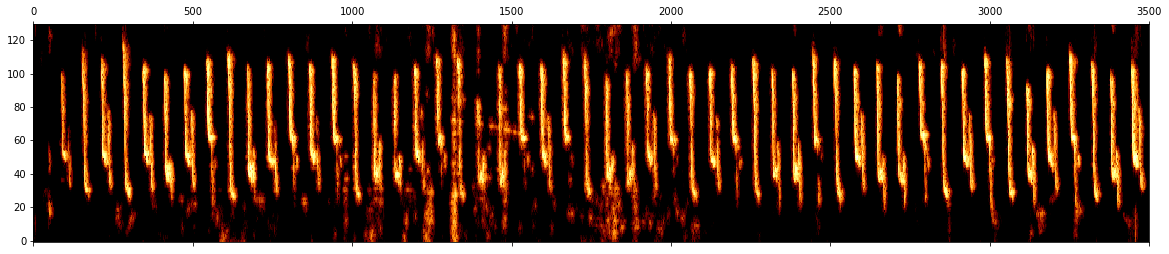

In [192]:
fig, ax = plt.subplots(figsize=(20,4))
ax.matshow(spec_nonstationary[ 50:180, :end2], origin = 'lower', aspect='auto', cmap = plt.cm.afmhot)

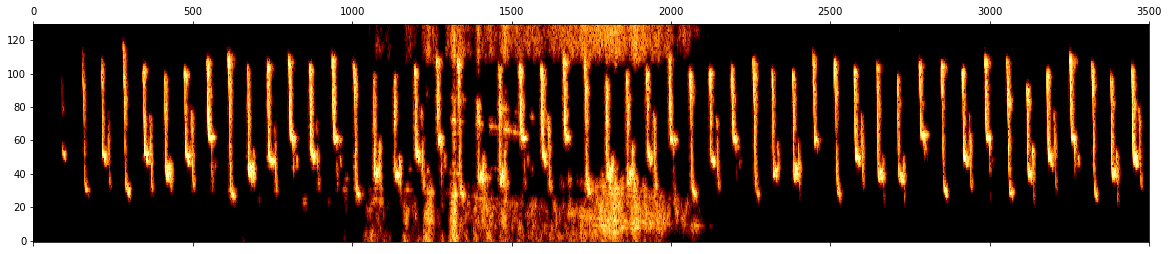

In [193]:
fig, ax = plt.subplots(figsize=(20,4))
ax.matshow(spec_stationary[ 50:180, :end2], origin = 'lower', aspect='auto', cmap = plt.cm.afmhot)

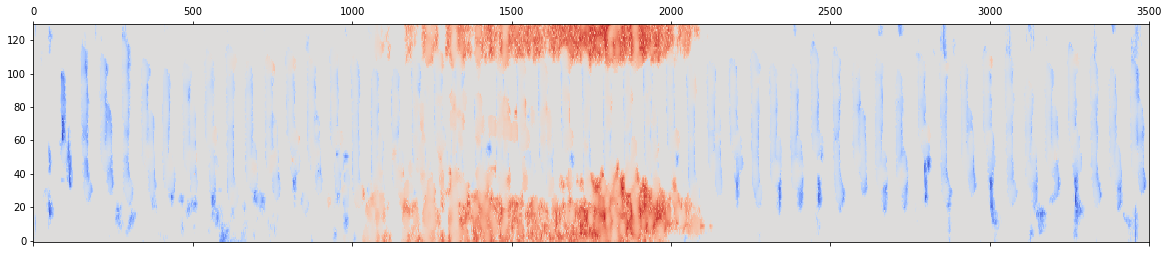

In [194]:
fig, ax = plt.subplots(figsize=(20,4))
diff_spec = spec_stationary[ 50:180, :end2] - spec_nonstationary[ 50:180, :end2]
ax.matshow(diff_spec, origin = 'lower', aspect='auto', cmap= plt.cm.coolwarm, vmax=np.max(np.abs(diff_spec)),vmin=-np.max(np.abs(diff_spec)))

In [226]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import gridspec

In [240]:
reduced_noise_stationary = nr.reduce_noise(y = y_with_noise, sr=sr, stationary=True, n_std_thresh_stationary = 1.25, n_fft = 512)
reduced_noise_nonstationary = nr.reduce_noise(y = y_with_noise, sr=sr, thresh_n_mult_nonstationary=1.5,stationary=False, time_constant_s = 0.5)

In [241]:
D = np.abs(librosa.stft(y_with_noise, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec = S_dB

D = np.abs(librosa.stft(reduced_noise_stationary, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec_stationary = S_dB
D = np.abs(librosa.stft(reduced_noise_nonstationary, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec_nonstationary = S_dB

In [242]:
min_freq = 50
max_freq = 180

In [243]:
len(y_with_noise)/sr

20.317460317460316

In [252]:
min_freq_hz = min_freq * (sr/2)/spec.shape[0]
max_freq_hz = max_freq * (sr/2)/spec.shape[0]
min_freq_hz, max_freq_hz

(2144.941634241245, 7721.789883268482)

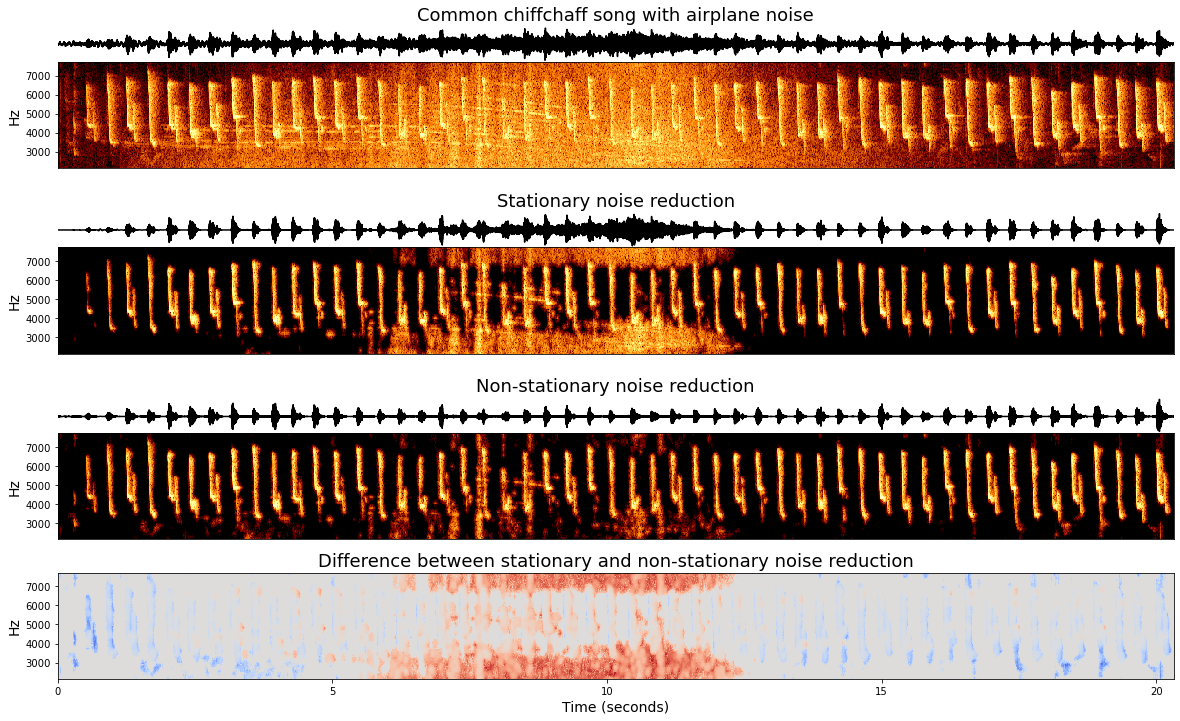

In [260]:
# plot it
fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(10, 1, height_ratios=[1, 3, 1.25, 1, 3, 1.25, 1, 3, 0.95, 3])
axs = []

ax = plt.subplot(gs[0])
ax.set_title("Common chiffchaff song with airplane noise", fontsize=18)
ax.plot(y_with_noise, color="k")
ax.set_xlim([0, len(y_with_noise)])
ax.axis("off")
ax.set_ylabel('Hz', fontsize=14)
axs.append(ax)

ax = plt.subplot(gs[1])
ax.matshow(
    spec[min_freq:max_freq, :end2], origin="lower", aspect="auto", cmap=plt.cm.afmhot,
    extent = [0, len(y_with_noise)/sr, min_freq_hz, max_freq_hz]
)
ax.xaxis.set_ticks([])
ax.set_ylabel('Hz', fontsize=14)
axs.append(ax)

ax = plt.subplot(gs[2])
ax.set_visible(False)

ax = plt.subplot(gs[3])
ax.set_title("Stationary noise reduction", fontsize=18)
ax.plot(reduced_noise_stationary, color="k")
ax.set_xlim([0, len(y_with_noise)])
ax.axis("off")
axs.append(ax)

ax = plt.subplot(gs[4])
ax.matshow(
    spec_stationary[min_freq:max_freq, :end2],
    origin="lower",
    aspect="auto",
    cmap=plt.cm.afmhot,
    extent = [0, len(y_with_noise)/sr, min_freq_hz, max_freq_hz]
)
ax.set_ylabel('Hz', fontsize=14)
ax.xaxis.set_ticks([])
axs.append(ax)

ax = plt.subplot(gs[5])
ax.set_visible(False)

ax = plt.subplot(gs[6])
ax.set_title("Non-stationary noise reduction", fontsize=18)
ax.plot(reduced_noise_nonstationary, color="k")
ax.set_xlim([0, len(y_with_noise)])
ax.axis("off")
axs.append(ax)

ax = plt.subplot(gs[7])
ax.matshow(
    spec_nonstationary[min_freq:max_freq, :end2],
    origin="lower",
    aspect="auto",
    cmap=plt.cm.afmhot,
    extent = [0, len(y_with_noise)/sr, min_freq_hz, max_freq_hz]
)
ax.set_ylabel('Hz', fontsize=14)
ax.xaxis.set_ticks([])
axs.append(ax)

ax = plt.subplot(gs[8])
ax.set_visible(False)

ax = plt.subplot(gs[9])
ax.set_title(
    "Difference between stationary and non-stationary noise reduction", fontsize=18
)
axs.append(ax)
diff_spec = (
    spec_stationary[min_freq:max_freq, :end2]
    - spec_nonstationary[min_freq:max_freq, :end2]
)
ax.matshow(
    diff_spec,
    origin="lower",
    aspect="auto",
    cmap=plt.cm.coolwarm,
    vmax=np.max(np.abs(diff_spec)),
    vmin=-np.max(np.abs(diff_spec)),
    extent = [0, len(y_with_noise)/sr, min_freq_hz, max_freq_hz]
)
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Hz', fontsize=14)
ax.xaxis.set_ticks_position("bottom")
plt.subplots_adjust(hspace=0.0)